In [96]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as sfa
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math as ma
import pylab

In [97]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Data Cleaning

In [110]:
#Ensure all data types can be worked with 
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [111]:
#Categorical variables Pregnancies and Outcome are categorized as numerical. Change them to categorical variables.
diabetes=diabetes.astype({'Pregnancies':'object','Outcome':'object'})
diabetes.dtypes

Pregnancies                  object
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

In [112]:
#Check for null values
isna = diabetes.isna().sum()
isna

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [113]:
diabetes[diabetes.Glucose == 0].count()

Pregnancies                 5
Glucose                     5
BloodPressure               5
SkinThickness               5
Insulin                     5
BMI                         5
DiabetesPedigreeFunction    5
Age                         5
Outcome                     5
dtype: int64

In [114]:
#Check for duplicates
dup = diabetes.duplicated(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
dup.value_counts()

False    768
dtype: int64

In [115]:
#As we can see, there are no duplicate entries in the data set
#Below, we can see that we have minimum values of 0 for Glucose, BloodPressure, SkinThickness and BMI, which does not make sense
diabetes.describe()

Glucose  BloodPressure  SkinThickness     Insulin         BMI  \
count  768.000000     768.000000     768.000000  768.000000  768.000000   
mean   120.894531      69.105469      20.536458   79.799479   31.992578   
std     31.972618      19.355807      15.952218  115.244002    7.884160   
min      0.000000       0.000000       0.000000    0.000000    0.000000   
25%     99.000000      62.000000       0.000000    0.000000   27.300000   
50%    117.000000      72.000000      23.000000   30.500000   32.000000   
75%    140.250000      80.000000      32.000000  127.250000   36.600000   
max    199.000000     122.000000      99.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         Age  
count                768.000000  768.000000  
mean                   0.471876   33.240885  
std                    0.331329   11.760232  
min                    0.078000   21.000000  
25%                    0.243750   24.000000  
50%                    0.372500   29.000000  
75%                    0.626250   41.000000  
max                    2.420000   81.000000

Text(0.5, 1.0, 'BMI vs Outcome')

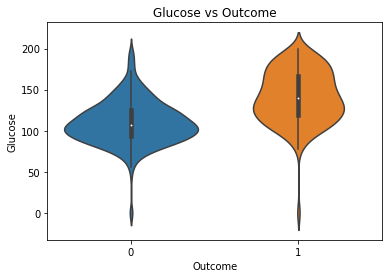

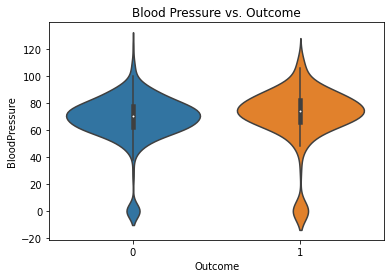

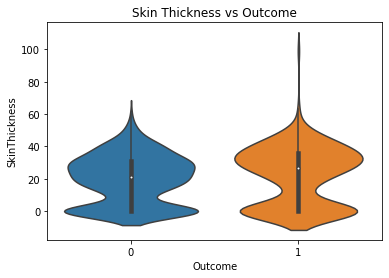

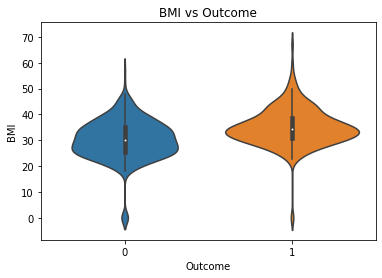

In [116]:
#In order to visualize this, we can create violin plots for each of these variables
plt.figure(1)
sns.violinplot(x='Outcome',y='Glucose',data=diabetes)
plt.title('Glucose vs Outcome')
plt.figure(2)
sns.violinplot(x='Outcome',y='BloodPressure',data=diabetes)
plt.title('Blood Pressure vs. Outcome')
plt.figure(3)
sns.violinplot(x='Outcome',y='SkinThickness',data=diabetes)
plt.title('Skin Thickness vs Outcome')
plt.figure(4)
sns.violinplot(x='Outcome',y='BMI',data=diabetes)
plt.title('BMI vs Outcome')

In [117]:
#Drop rows that have values of 0 for Glucose, BloodPressure, SkinThickness and BMI 

variable_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

for variable in variable_list:
    index_names = diabetes[(diabetes[variable] == 0)].index
    diabetes.drop(index_names, inplace = True)

In [118]:
#As we can see below, minimums for Glucose, BloodPressure, SkinThickness and BMI are now above 0
diabetes.describe()

Glucose  BloodPressure  SkinThickness     Insulin         BMI  \
count  532.000000     532.000000     532.000000  532.000000  532.000000   
mean   121.030075      71.505639      29.182331  114.988722   32.890226   
std     30.999226      12.310253      10.523878  123.007555    6.881109   
min     56.000000      24.000000       7.000000    0.000000   18.200000   
25%     98.750000      64.000000      22.000000    0.000000   27.875000   
50%    115.000000      72.000000      29.000000   91.500000   32.800000   
75%    141.250000      80.000000      36.000000  165.250000   36.900000   
max    199.000000     110.000000      99.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         Age  
count                532.000000  532.000000  
mean                   0.502966   31.614662  
std                    0.344546   10.761584  
min                    0.085000   21.000000  
25%                    0.258750   23.000000  
50%                    0.416000   28.000000  
75%                    0.658500   38.000000  
max                    2.420000   81.000000

In [119]:
#As we can see below, 355 women in the dataset do not have diabetes while 177 women have diabetes
diabetes.groupby('Outcome').count()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Outcome                                                                     
0                355      355            355            355      355  355   
1                177      177            177            177      177  177   

         DiabetesPedigreeFunction  Age  
Outcome                                 
0                             355  355  
1                             177  177

# Testing Normality

Text(0.5, 1.0, 'Histogram for Pregnancies')

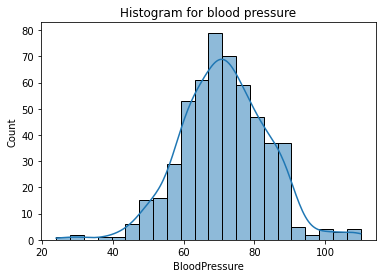

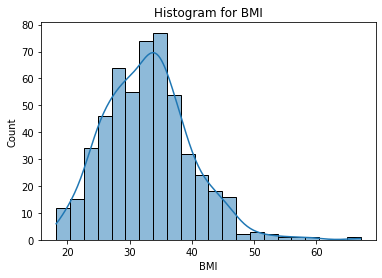

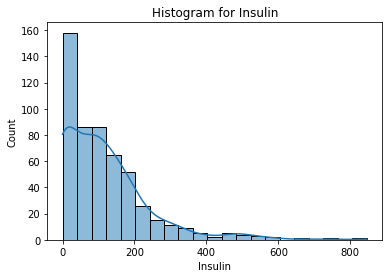

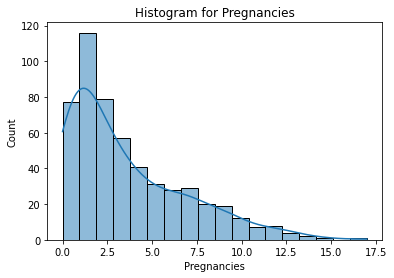

In [121]:
plt.figure(1)
sns.histplot(x="BloodPressure", data=diabetes, kde=True, palette="ocean_r")
plt.title('Histogram for blood pressure')
plt.figure(2)
sns.histplot(x="BMI", data=diabetes, kde=True, palette="ocean_r")
plt.title('Histogram for BMI')
plt.figure(3)
sns.histplot(x="Insulin", data=diabetes, kde=True, palette="ocean_r")
plt.title('Histogram for Insulin')
plt.figure(4)
sns.histplot(x="Pregnancies", data=diabetes, kde=True, palette="ocean_r")
plt.title('Histogram for Pregnancies')

In [38]:
#While blood pressure appears normal, data for BMI, insulin and pregnancies appear non-normal
for var in ['BloodPressure','BMI','Insulin','Pregnancies','Glucose']:
    shapiro = stats.shapiro(diabetes[var])
    print(var)
    print("test statistic: {1} p-value: {2}".format(var,shapiro[0],shapiro[1]))

BloodPressure
test statistic: 0.9897131323814392 p-value: 0.0008822749368846416
BMI
test statistic: 0.9775753021240234 p-value: 2.782182377814024e-07
Insulin
test statistic: 0.8190615177154541 p-value: 5.138705806495257e-24
Pregnancies
test statistic: 0.8729642629623413 p-value: 2.0318265183925898e-20
Glucose
test statistic: 0.9578415155410767 p-value: 3.344758497947353e-11


In [39]:
#According to the Shapiro-Wilk test, all four variables are not normally distributed (???)
#From internet: If the Sig. value of the Shapiro-Wilk Test is greater than 0.05, the data is normal. If it is below 0.05, the data significantly deviate from a normal distribution.


# Exploratory Data Analysis

Text(0.5, 1.0, 'Histogram for blood pressure')

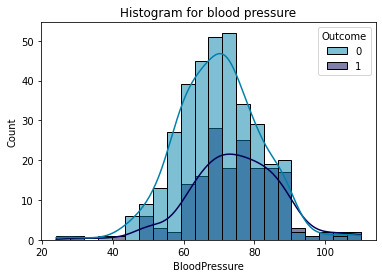

In [122]:
#Blood pressure seems higher for people with diabetes
sns.histplot(x="BloodPressure", hue="Outcome", data=diabetes, kde=True, palette="ocean_r")
plt.title('Histogram for blood pressure')

Text(0.5, 1.0, 'Histogram for BMI')

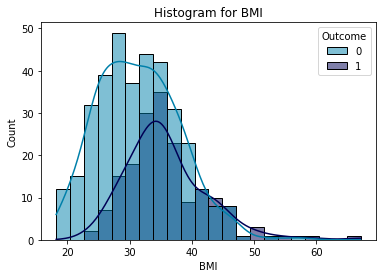

In [123]:
#BMI is generally higher for people with diabetes
sns.histplot(x="BMI", hue="Outcome", data=diabetes, kde=True, palette="ocean_r")
plt.title('Histogram for BMI')

Text(0.5, 1.0, 'Histogram for Insulin')

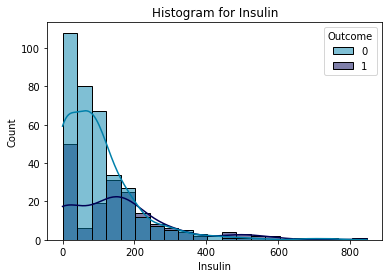

In [124]:
#Insulin is generally higher for people with diabetes
sns.histplot(x="Insulin", hue="Outcome", data=diabetes, kde=True, palette="ocean_r")
plt.title('Histogram for Insulin')

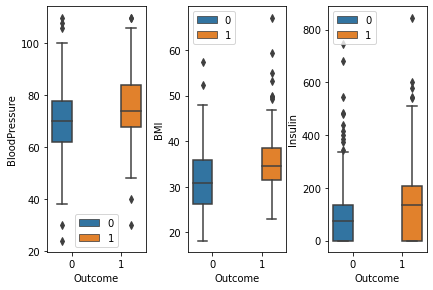

In [43]:
#The boxplots below show that women with diabetes appear to have higher mean blood pressures, BMI and insulin levels
fig, axs = plt.subplots(ncols=3)
fig.tight_layout()
sns.boxplot(data=diabetes, x="Outcome", y="BloodPressure", hue=diabetes.Outcome.tolist(), ax=axs[0])
sns.boxplot(data=diabetes, x="Outcome", y="BMI", hue=diabetes.Outcome.tolist(), ax=axs[1])
sns.boxplot(data=diabetes, x="Outcome", y="Insulin", hue=diabetes.Outcome.tolist(), ax=axs[2])
plt.show()

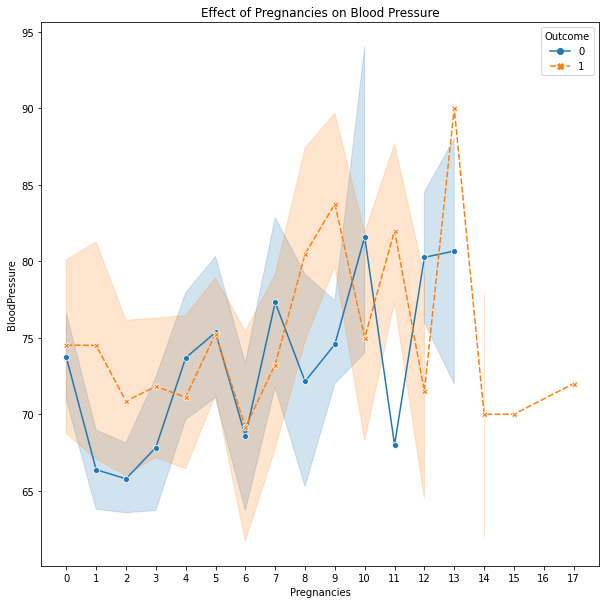

In [44]:
#We want to look a little more closely at Pregnancies, BloodPressure, BMI and Insulin 
#Let's start with Pregnancies and BloodPressure, 
plt.figure(figsize=(10,10))
ax=sns.lineplot(x='Pregnancies',y='BloodPressure',data=diabetes,hue='Outcome',style='Outcome',markers=True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.title('Effect of Pregnancies on Blood Pressure')
plt.show()

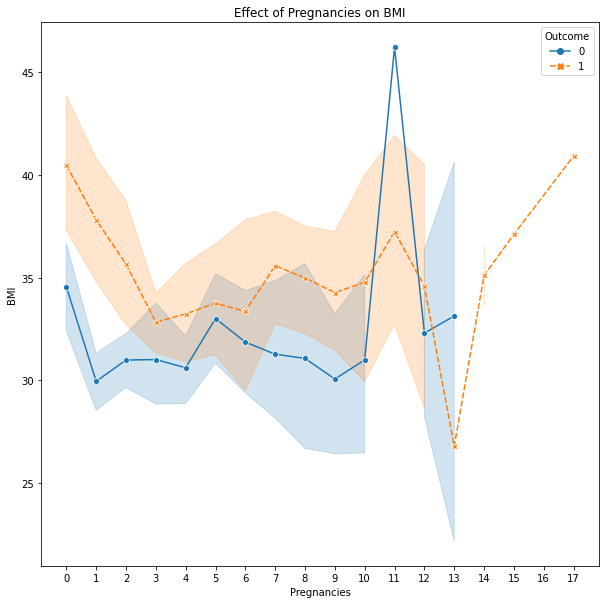

In [45]:
#There does not seem to be a discernable difference in blood pressure between women who have diabetes and women who do not have diabetes
#From the outset, there does not seem to be any pattern between womens' blood pressure and the number of pregnancies 
plt.figure(figsize=(10,10))
ax=sns.lineplot(x='Pregnancies',y='BMI',data=diabetes,hue='Outcome',style='Outcome',markers=True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.title('Effect of Pregnancies on BMI')
plt.show()

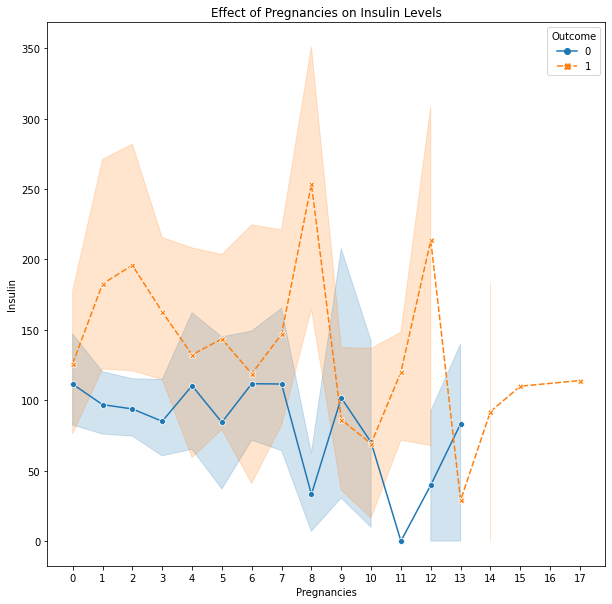

In [46]:
#It appears from the graph above that women with diabetes have higher BMI levels
#However, there does not seem to be a discernable effect of pregnancies on BMI levels
plt.figure(figsize=(10,10))
ax=sns.lineplot(x='Pregnancies',y='Insulin',data=diabetes,hue='Outcome',style='Outcome',markers=True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.title('Effect of Pregnancies on Insulin Levels')
plt.show()

In [47]:
#It appears that people with diabetes have higher insulin levels
#There also appears to be slight downward trend for the effect of pregnancies on insulin levels, though this remains unclear


# Hypothesis testing: t tests

In [48]:
#Let's perform preliminary t-tests on the following hypotheses:
#Null hypothesis = no difference between mean BMI for people with diabetes vs people who do not have diabetes
#Alternative hypothesis = there is a difference between mean BMI for people with diabetes vs people who do not have diabetes
positive_diabetes = diabetes[diabetes.Outcome == 1]
negative_diabetes = diabetes[diabetes.Outcome == 0]
tStat, pValue = stats.ttest_ind(positive_diabetes['BMI'], negative_diabetes['BMI'], equal_var=False)
print("P-Value: {0} T-Statistic:{1}".format(pValue,tStat))
if pValue < 0.05:
    print("Null hypothesis rejected: there is a statistically significant difference between mean BMI for people who have diabetes and people who do not have diabetes")
else:
    print("Fail to reject null hypothesis: there is no significant difference between mean BMI for people who have diabetes and people who do not have diabetes")
    

P-Value: 2.887496484093055e-12 T-Statistic:7.23997950615033
Null hypothesis rejected: there is a statistically significant difference between mean BMI for people who have diabetes and people who do not have diabetes


In [49]:
#Effect size for BMI
def calculateCohen(samp1,samp2):
    diff = abs(samp1.mean()-samp2.mean())
    pooledstdev = ma.sqrt((samp1.std()**2 + samp2.std()**2)/2)
    cohend = round(diff/pooledstdev,2)
    return cohend

calculateCohen(positive_diabetes.BMI, negative_diabetes.BMI)

0.67

In [50]:
#As seen above, there is a medium effect size between the mean BMIs for people with and without diabetes, which are 0.67 standard deviations away from each other

#Null hypothesis = no difference between mean blood pressure for people with diabetes vs people who do not have diabetes
#Alternative hypothesis = there is a difference between mean blood pressure for people with diabetes vs people who do not have diabetes
tStat, pValue = stats.ttest_ind(positive_diabetes['BloodPressure'], negative_diabetes['BloodPressure'], equal_var=False)
print("P-Value: {0} T-Statistic:{1}".format(pValue,tStat))
if pValue < 0.05:
    print("Null hypothesis rejected: there is a statistically significant difference between mean blood pressure for people who have diabetes and people who do not have diabetes")
else:
    print("Fail to reject null hypothesis: there is no significant difference between mean blood pressure for people who have diabetes and people who do not have diabetes")

P-Value: 3.103271818105763e-05 T-Statistic:4.22327681253709
Null hypothesis rejected: there is a statistically significant difference between mean blood pressure for people who have diabetes and people who do not have diabetes


In [51]:
#Effect size for blood pressure
calculateCohen(positive_diabetes.BloodPressure, negative_diabetes.BloodPressure)

0.39

In [126]:
#As seen above, there is a small effect size between the mean blood pressures for people with and without diabetes, which are 0.39 standard deviations away from each other

#Null hypothesis = no difference between mean insulin levels for people with diabetes vs people who do not have diabetes
#Alternative hypothesis = there is a difference between mean insulin levels for people with diabetes vs people who do not have diabetes
tStat, pValue = stats.ttest_ind(positive_diabetes['Insulin'], negative_diabetes['Insulin'], equal_var=False)
print("P-Value: {0} T-Statistic:{1}".format(pValue,tStat))
if pValue < 0.05:
    print("Null hypothesis rejected: there is a statistically significant difference between mean insulin levels for people who have diabetes and people who do not have diabetes")
else:
    print("Fail to reject null hypothesis: there is no significant difference between mean insulin levels for people who have diabetes and people who do not have diabetes")

P-Value: 1.0297136259212602e-05 T-Statistic:4.495740299321233
Null hypothesis rejected: there is a statistically significant difference between mean insulin levels for people who have diabetes and people who do not have diabetes


In [127]:
#Effect size for insulin levels
calculateCohen(positive_diabetes.Insulin, negative_diabetes.Insulin)

0.43

In [128]:
#As seen above, there is a small effect size between the mean insulin levels for people with and without diabetes, which are 0.43 standard deviations away from each other

#Null hypothesis = no difference between mean pregnancies for people with diabetes vs people who do not have diabetes
#Alternative hypothesis = there is a difference between mean pregnancies for people with diabetes vs people who do not have diabetes
tStat, pValue = stats.ttest_ind(positive_diabetes['Pregnancies'], negative_diabetes['Pregnancies'], equal_var=False)
print("P-Value: {0} T-Statistic:{1}".format(pValue,tStat))
if pValue < 0.05:
    print("Null hypothesis rejected: there is a statistically significant difference between mean pregnancies for people who have diabetes and people who do not have diabetes")
else:
    print("Fail to reject null hypothesis: there is no significant difference between mean pregnancies for people who have diabetes and people who do not have diabetes")

P-Value: 1.6172671627861148e-07 T-Statistic:5.381203044947255
Null hypothesis rejected: there is a statistically significant difference between mean pregnancies for people who have diabetes and people who do not have diabetes


In [129]:
#Effect size for pregnancies
calculateCohen(positive_diabetes.Pregnancies, negative_diabetes.Pregnancies)

0.52

In [130]:
#As seen above, there is a medium effect size between the mean number of pregnancies for people with and without diabetes, which are 0.43 standard deviations away from each other


#Null hypothesis = no difference between mean BMI for people who have been pregnant vs people who have never been pregnant
#Alternative hypothesis = there is a difference between mean BMI for people who have been pregnant vs people who have never been pregnant
positive_pregnancy = diabetes[diabetes.Pregnancies > 0]
negative_pregnancy = diabetes[diabetes.Pregnancies == 0]
tStat, pValue = stats.ttest_ind(positive_pregnancy['BMI'], negative_pregnancy['BMI'], equal_var=False)
print("P-Value: {0} T-Statistic:{1}".format(pValue,tStat))
if pValue < 0.05:
    print("Null hypothesis rejected: there is a statistically significant difference between mean BMI for people who have been pregnant vs people who have never been pregnant")
else:
    print("Fail to reject null hypothesis: there is no significant difference between mean BMI for people who have been pregnant vs people who have never been pregnant")
    

P-Value: 6.103870414056505e-05 T-Statistic:-4.207212996343845
Null hypothesis rejected: there is a statistically significant difference between mean BMI for people who have been pregnant vs people who have never been pregnant


In [131]:
#Null hypothesis = no difference between mean blood pressure for people who have been pregnant vs people who have never been pregnant
#Alternative hypothesis = there is a difference between mean blood pressure for people who have been pregnant vs people who have never been pregnant
positive_pregnancy = diabetes[diabetes.Pregnancies > 0]
negative_pregnancy = diabetes[diabetes.Pregnancies == 0]
tStat, pValue = stats.ttest_ind(positive_pregnancy['BloodPressure'], negative_pregnancy['BloodPressure'], equal_var=False)
print("P-Value: {0} T-Statistic:{1}".format(pValue,tStat))
if pValue < 0.05:
    print("Null hypothesis rejected: there is a statistically significant difference between mean blood pressure for people who have been been pregnant vs people who have never been pregnant")
else:
    print("Fail to reject null hypothesis: there is no significant difference between mean blood pressure for people who have been pregnant vs people who have never been pregnant")
    

P-Value: 0.06463412044226143 T-Statistic:-1.8681946928788968
Fail to reject null hypothesis: there is no significant difference between mean blood pressure for people who have been pregnant vs people who have never been pregnant


In [132]:
tStat, pValue = stats.ttest_ind(positive_pregnancy['Insulin'], negative_pregnancy['Insulin'], equal_var=False)
print("P-Value: {0} T-Statistic:{1}".format(pValue,tStat))
if pValue < 0.05:
    print("Null hypothesis rejected: there is a statistically significant difference between mean insulin levels for people who have been pregnant vs people who have never been pregnant")
else:
    print("Fail to reject null hypothesis: there is no significant difference between mean insulin levels for people who have been pregnant vs people who have never been pregnant")
    

P-Value: 0.9035810868134504 T-Statistic:-0.12143927988489782
Fail to reject null hypothesis: there is no significant difference between mean insulin levels for people who have been pregnant vs people who have never been pregnant


# ANOVA

In [135]:
#Initial ANOVA test for pregnancies 
tStat, pValue = stats.f_oneway(positive_diabetes['Pregnancies'], negative_diabetes['Pregnancies'])
print("P-Value: {0} T-Statistic:{1}".format(pValue,tStat))
if pValue < 0.05:
    print("Null hypothesis rejected: there is a statistically significant difference between mean pregnancies for people with/without diabetes")
else:
    print("Fail to reject null hypothesis: there is no significant difference between mean pregnancies for people with/without diabetes")
    

P-Value: 3.4569736448724904e-09 T-Statistic:36.11801236025004
Null hypothesis rejected: there is a statistically significant difference between mean pregnancies for people with/without diabetes


In [136]:
#Effect size for pregnancies
#Calculating effect size for mean BMI between pregnancy groups
def calculateCohen(samp1,samp2):
    diff = abs(samp1.mean()-samp2.mean())
    pooledstdev = ma.sqrt((samp1.std()**2 + samp2.std()**2)/2)
    cohend = round(diff/pooledstdev,2)
    return cohend

calculateCohen(positive_diabetes.Pregnancies,negative_diabetes.Pregnancies)

0.52

In [137]:
#As we can see above, there is a medium effect size between the means of pregnancies between people who have diabetes and do not have diabetes, which are 0.52 standard deviations away from each other

#Let's take a look at how the number pregnancies may affect BMI levels
pregnancy_none = diabetes[diabetes.Pregnancies == 0]
pregnancy_onetofive = diabetes[diabetes.Pregnancies.between(1, 5)]
pregnancy_sixtoten = diabetes[diabetes.Pregnancies.between(6, 10)]
pregnancy_aboveten = diabetes[diabetes.Pregnancies > 10]


In [138]:
#ANOVA test for pregnancies 
tStat, pValue = stats.f_oneway(pregnancy_none['BMI'], pregnancy_onetofive['BMI'], pregnancy_sixtoten['BMI'], pregnancy_aboveten['BMI'])

print("P-Value: {0} T-Statistic:{1}".format(pValue,tStat))
if pValue < 0.05:
    print("Null hypothesis rejected: there is a statistically significant difference between mean BMIs for people who have had more pregnancies")
else:
    print("Fail to reject null hypothesis: there is no significant difference between mean BMIs for people who have had more pregnancies")
    

P-Value: 1.2305201074582783e-07 T-Statistic:12.042983944349086
Null hypothesis rejected: there is a statistically significant difference between mean BMIs for people who have had more pregnancies


In [139]:
#In order to perform tukey tests, we shall first create pregnancy_group as a column below
def label_pregnancy(row):
    if row['Pregnancies'] == 0 :
      return 'pregnancy_none'
    if 1 <= row['Pregnancies'] <= 5:
      return 'pregnancy_onetofive'
    if 6 <= row['Pregnancies'] <= 10:
      return 'pregnancy_sixtoten'
    if row['Pregnancies'] > 10:
      return 'pregnancy_aboveten'

diabetes['pregnancy_group'] = diabetes.apply (lambda row: label_pregnancy(row), axis=1)

#Tukey test for BMI
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=diabetes['BMI'], groups=diabetes['pregnancy_group'], alpha=0.05)
print(tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
 pregnancy_aboveten      pregnancy_none   1.3408 0.8328 -2.7477  5.4292  False
 pregnancy_aboveten pregnancy_onetofive  -3.5067  0.072 -7.2195  0.2061  False
 pregnancy_aboveten  pregnancy_sixtoten  -2.2206 0.4697 -6.1718  1.7306  False
     pregnancy_none pregnancy_onetofive  -4.8475    0.0 -7.0288 -2.6661   True
     pregnancy_none  pregnancy_sixtoten  -3.5613 0.0021 -6.1276 -0.9951   True
pregnancy_onetofive  pregnancy_sixtoten   1.2861 0.3071 -0.6256  3.1978  False
------------------------------------------------------------------------------


In [140]:
#From the tukey test, we can conclude that there is a statistically significant difference between the blood pressure means of:
#zero pregnancies and one to five pregnancies, zero pregnancies and six to ten pregnancies

#Calculating effect size for mean BMI between pregnancy groups
#Create effect size table
from tabulate import tabulate
mydata = [
    ["pregnancy_none",str(calculateCohen(pregnancy_none.BMI,pregnancy_onetofive.BMI)),str(calculateCohen(pregnancy_none.BMI,pregnancy_sixtoten.BMI)),str(calculateCohen(pregnancy_none.BMI,pregnancy_aboveten.BMI))],
    ["pregnancy_onetofive","",str(calculateCohen(pregnancy_onetofive.BMI,pregnancy_sixtoten.BMI)),str(calculateCohen(pregnancy_onetofive.BMI,pregnancy_aboveten.BMI))],
    ["pregnancy_sixtoten","","",str(calculateCohen(pregnancy_sixtoten.BMI,pregnancy_aboveten.BMI))],
]
 
head = ["","pregnancy_onetofive", "pregnancy_sixtoten", "pregnancy_aboveten"]

print("Effect size for BMI")
print(tabulate(mydata, headers=head, tablefmt="grid"))


Effect size for BMI
+---------------------+-----------------------+----------------------+----------------------+
|                     | pregnancy_onetofive   | pregnancy_sixtoten   |   pregnancy_aboveten |
+=====================+=======================+======================+======================+
| pregnancy_none      | 0.64                  | 0.48                 |                 0.17 |
+---------------------+-----------------------+----------------------+----------------------+
| pregnancy_onetofive |                       | 0.21                 |                 0.55 |
+---------------------+-----------------------+----------------------+----------------------+
| pregnancy_sixtoten  |                       |                      |                 0.36 |
+---------------------+-----------------------+----------------------+----------------------+


In [141]:
#We do not have any large effect sizes of above 0.8
#We can see a medium effect size between the means for no pregnancies and one to five pregnancies, which are 0.64 standard deviations away from each other
#We can also see a medium effect size between the means for one to five pregnancies and above ten pregnancies, which are 0.55 standard deviations away from each other

#ANOVA test for Insulin
tStat, pValue = stats.f_oneway(pregnancy_none['Insulin'], pregnancy_onetofive['Insulin'], pregnancy_sixtoten['BloodPressure'], pregnancy_aboveten['BloodPressure'])
print("P-Value: {0} T-Statistic:{1}".format(pValue,tStat))
if pValue < 0.05:
    print("Null hypothesis rejected: there is a statistically significant difference between mean insulin levels for people who have had more pregnancies")
else:
    print("Fail to reject null hypothesis: there is no significant difference between mean insulin levels for people who have had more pregnancies")
    

P-Value: 0.005410635115294194 T-Statistic:4.269896486407584
Null hypothesis rejected: there is a statistically significant difference between mean insulin levels for people who have had more pregnancies


In [142]:
#Tukey test for insulin
tukey = pairwise_tukeyhsd(endog=diabetes['Insulin'], groups=diabetes['pregnancy_group'], alpha=0.05)
print(tukey)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------------
 pregnancy_aboveten      pregnancy_none   11.367 0.9801 -64.1425 86.8765  False
 pregnancy_aboveten pregnancy_onetofive   8.0141 0.9905 -60.5567 76.5849  False
 pregnancy_aboveten  pregnancy_sixtoten  15.9863 0.9425 -56.9881 88.9608  False
     pregnancy_none pregnancy_onetofive  -3.3529 0.9965   -43.64 36.9341  False
     pregnancy_none  pregnancy_sixtoten   4.6193 0.9944 -42.7765 52.0151  False
pregnancy_onetofive  pregnancy_sixtoten   7.9722 0.9375 -27.3354 43.2798  False
-------------------------------------------------------------------------------


In [143]:
#None of the group pairings are statistically significant

#Calculating effect size for mean insulin levels between pregnancy groups
mydata = [
    ["pregnancy_none",str(calculateCohen(pregnancy_none.Insulin,pregnancy_onetofive.Insulin)),str(calculateCohen(pregnancy_none.Insulin,pregnancy_sixtoten.Insulin)),str(calculateCohen(pregnancy_none.Insulin,pregnancy_aboveten.Insulin))],
    ["pregnancy_onetofive","",str(calculateCohen(pregnancy_onetofive.Insulin,pregnancy_sixtoten.Insulin)),str(calculateCohen(pregnancy_onetofive.Insulin,pregnancy_aboveten.Insulin))],
    ["pregnancy_sixtoten","","",str(calculateCohen(pregnancy_sixtoten.Insulin,pregnancy_aboveten.Insulin))],
]
 
print("Effect size for Insulin")
print(tabulate(mydata, headers=head, tablefmt="grid"))


Effect size for Insulin
+---------------------+-----------------------+----------------------+----------------------+
|                     | pregnancy_onetofive   | pregnancy_sixtoten   |   pregnancy_aboveten |
+=====================+=======================+======================+======================+
| pregnancy_none      | 0.03                  | 0.04                 |                 0.1  |
+---------------------+-----------------------+----------------------+----------------------+
| pregnancy_onetofive |                       | 0.06                 |                 0.07 |
+---------------------+-----------------------+----------------------+----------------------+
| pregnancy_sixtoten  |                       |                      |                 0.14 |
+---------------------+-----------------------+----------------------+----------------------+


In [144]:
#As we can see above, the effect sizes between the means for all pregnancy groups are negligible

#ANOVA test for BloodPressure
tStat, pValue = stats.f_oneway(pregnancy_none['BloodPressure'], pregnancy_onetofive['BloodPressure'], pregnancy_sixtoten['BloodPressure'], pregnancy_aboveten['BloodPressure'])
print("P-Value: {0} T-Statistic:{1}".format(pValue,tStat))
if pValue < 0.05:
    print("Null hypothesis rejected: there is a statistically significant difference between mean blood pressures for people who have had more pregnancies")
else:
    print("Fail to reject null hypothesis: there is no significant difference between mean blood pressures for people who have had more pregnancies")
    

P-Value: 2.352242645161174e-06 T-Statistic:9.891716983762333
Null hypothesis rejected: there is a statistically significant difference between mean blood pressures for people who have had more pregnancies


In [145]:
#Calculating tukey test for mean blood pressure between pregnancy groups
tukey = pairwise_tukeyhsd(endog=diabetes['BloodPressure'], groups=diabetes['pregnancy_group'], alpha=0.05)
print(tukey)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------------
 pregnancy_aboveten      pregnancy_none  -3.4348  0.625 -10.7912  3.9217  False
 pregnancy_aboveten pregnancy_onetofive  -8.1447 0.0096 -14.8251 -1.4642   True
 pregnancy_aboveten  pregnancy_sixtoten  -2.3237 0.8342  -9.4331  4.7858  False
     pregnancy_none pregnancy_onetofive  -4.7099 0.0112  -8.6348  -0.785   True
     pregnancy_none  pregnancy_sixtoten   1.1111 0.9256  -3.5064  5.7286  False
pregnancy_onetofive  pregnancy_sixtoten    5.821 0.0001   2.3812  9.2608   True
-------------------------------------------------------------------------------


In [146]:
#As we can see above, there is a statistical difference between the blood pressure means of people who've had one to five pregnancies and every other group

#Calculating effect size for mean blood pressure between pregnancy groups
mydata = [
    ["pregnancy_none",str(calculateCohen(pregnancy_none.BloodPressure,pregnancy_onetofive.BloodPressure)),str(calculateCohen(pregnancy_none.BloodPressure,pregnancy_sixtoten.BloodPressure)),str(calculateCohen(pregnancy_none.BloodPressure,pregnancy_aboveten.BloodPressure))],
    ["pregnancy_onetofive","",str(calculateCohen(pregnancy_onetofive.BloodPressure,pregnancy_sixtoten.BloodPressure)),str(calculateCohen(pregnancy_onetofive.BloodPressure,pregnancy_aboveten.BloodPressure))],
    ["pregnancy_sixtoten","","",str(calculateCohen(pregnancy_sixtoten.BloodPressure,pregnancy_aboveten.BloodPressure))],
]
 
print("Effect size for Blood Pressure")
print(tabulate(mydata, headers=head, tablefmt="grid"))

Effect size for Blood Pressure
+---------------------+-----------------------+----------------------+----------------------+
|                     | pregnancy_onetofive   | pregnancy_sixtoten   |   pregnancy_aboveten |
+=====================+=======================+======================+======================+
| pregnancy_none      | 0.38                  | 0.09                 |                 0.32 |
+---------------------+-----------------------+----------------------+----------------------+
| pregnancy_onetofive |                       | 0.49                 |                 0.78 |
+---------------------+-----------------------+----------------------+----------------------+
| pregnancy_sixtoten  |                       |                      |                 0.23 |
+---------------------+-----------------------+----------------------+----------------------+


In [147]:
#We do not have any large effect sizes of above 0.8
#However, there is a medium effect size between the means for one to five pregnancies and more than pregnancies, which are 0.78 standard deviations away from each other 

#Based on the ANOVA results above, it appears that although the t-test found no statistically significant difference between 
#mean blood pressures and insulin in people who have been pregnant vs never been pregnant, when grouping the number of pregnancies further,
#there is a significant difference between mean blood pressures and insulin levels in people who have had more pregancies 

#However, upon further analysis, insulin levels between the group pairings do not appear to be statistically significant

Text(0.5, 1.0, 'Boxplot for Insulin')

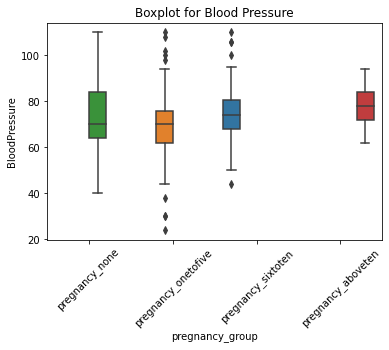

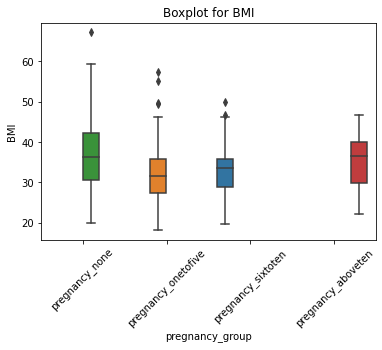

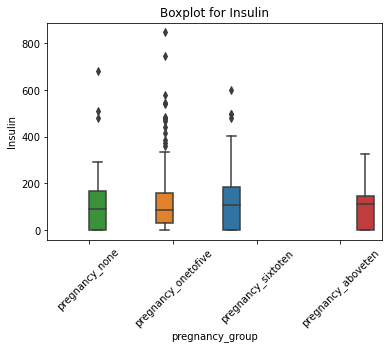

In [150]:
#The boxplots below show that women with diabetes appear to have higher mean blood pressures, BMI and insulin levels
pregnancy_order=["pregnancy_none","pregnancy_onetofive","pregnancy_sixtoten","pregnancy_aboveten"]
diabetes["pregnancy_group"] = pd.Categorical(diabetes["pregnancy_group"], categories = pregnancy_order)
diabetes.sort_values(by = "pregnancy_group")
plt.figure(1)
sns.boxplot(data=diabetes, x="pregnancy_group", y="BloodPressure", hue=diabetes.pregnancy_group.tolist())
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.title('Boxplot for Blood Pressure')
plt.figure(2)
sns.boxplot(data=diabetes, x="pregnancy_group", y="BMI", hue=diabetes.pregnancy_group.tolist())
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.title('Boxplot for BMI')
plt.figure(3)
sns.boxplot(data=diabetes, x="pregnancy_group", y="Insulin", hue=diabetes.pregnancy_group.tolist())
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.title('Boxplot for Insulin')

In [149]:
diabetes.groupby('pregnancy_group').mean()

Glucose  BloodPressure  SkinThickness     Insulin  \
pregnancy_group                                                             
pregnancy_none       126.415584      74.000000      31.506494  116.584416   
pregnancy_onetofive  116.703704      69.290123      27.688272  113.231481   
pregnancy_sixtoten   128.611111      75.111111      31.240741  121.203704   
pregnancy_aboveten   128.347826      77.434783      32.782609  105.217391   

                           BMI  DiabetesPedigreeFunction        Age  
pregnancy_group                                                      
pregnancy_none       36.623377                  0.522416  25.688312  
pregnancy_onetofive  31.775926                  0.490330  28.475309  
pregnancy_sixtoten   33.062037                  0.522602  42.083333  
pregnancy_aboveten   35.282609                  0.523652  46.521739

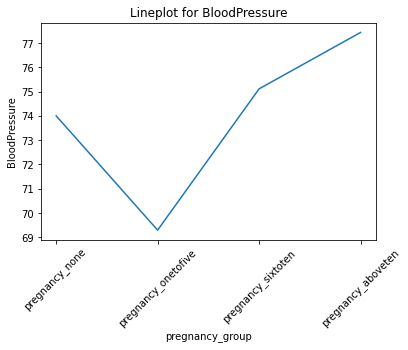

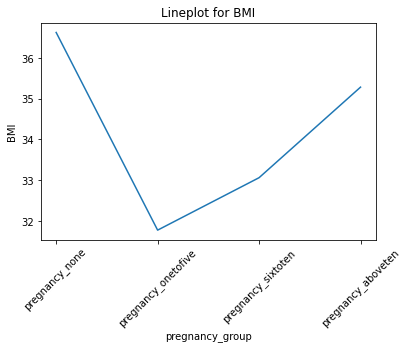

In [153]:
var_list = ["BloodPressure","BMI"]
for idx, variable in enumerate(var_list):
    plt.figure(idx)
    group_means = diabetes.groupby('pregnancy_group')[variable].mean()
    sns.lineplot(data=group_means, markers = True)
    plt.xticks(rotation=45)
    plt.title('Lineplot for '+variable)

Text(0.5, 1.0, 'Percentage of Women with Diabetes')

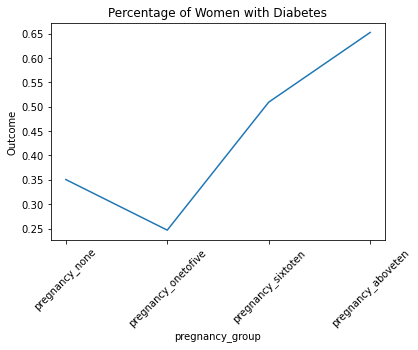

In [161]:
#Percentage of women with diabetes seems to drop between 1 to 5 pregnancies before increasing again, echoing our previous findings for higher blood pressures, insulin levels and BMI levels
positive_diabetes = diabetes[diabetes.Outcome == 1]
percentage_diabetes = positive_diabetes.groupby('pregnancy_group').count()['Outcome']/diabetes.groupby('pregnancy_group').count()['Outcome']
sns.lineplot(data=percentage_diabetes, markers = True)
plt.xticks(rotation=45)
plt.title('Percentage of Women with Diabetes')

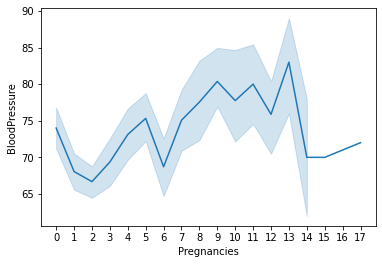

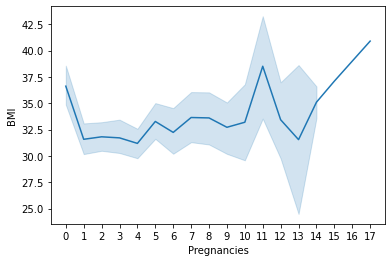

In [159]:
preg = diabetes.BloodPressure
#sns.lineplot(data=group_means, markers = True)
plt.figure(1)
sns.lineplot(data = diabetes, x='Pregnancies', y='BloodPressure')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.show()

plt.figure(2)
sns.lineplot(data = diabetes, x='Pregnancies', y='BMI')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.show()

# Linear Regression

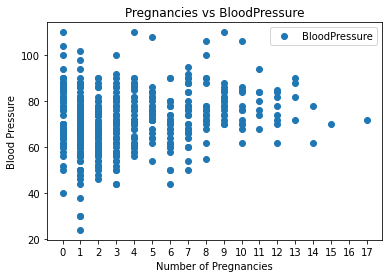

In [79]:
#plotting Pregnancies vs Blood Pressure
diabetes.plot(x='Pregnancies', y='BloodPressure', style='o')
plt.title('Pregnancies vs BloodPressure')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Blood Pressure')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.show()

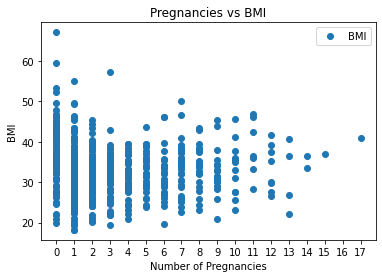

In [80]:
#plotting Pregnancies vs BMI
diabetes.plot(x='Pregnancies', y='BMI', style='o')
plt.title('Pregnancies vs BMI')
plt.xlabel('Number of Pregnancies')
plt.ylabel('BMI')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.show()

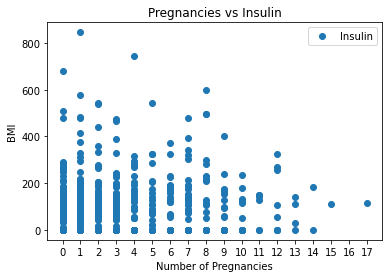

In [162]:
#plotting Pregnancies vs Insulin
diabetes.plot(x='Pregnancies', y='Insulin', style='o')
plt.title('Pregnancies vs Insulin')
plt.xlabel('Number of Pregnancies')
plt.ylabel('BMI')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.show()

In [196]:
#Linear regression with blood pressure as dependent variable
X = diabetes[['Pregnancies']]
y = diabetes['BloodPressure']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(f'intercept: {regressor.intercept_}')
print(f'regression coefficient: {regressor.coef_}')
print(f'r_sqr value: {regressor.score(X_train, y_train)}')

intercept: 68.75156957413695
regression coefficient: [0.8169513]
r_sqr value: 0.05135216152685518


In [197]:
#As seen above, via linear regression we expect blood pressure to be 68.75mm Hg when someone has had no pregnancies
#With every pregnancy, blood pressure is expected to increase by 0.82mm Hg
#An r square value of 0.051 indicates that pregnancies do not significantly explain variances in blood pressure

#Calculating predicted values below
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual  Predicted
580      90  68.751570
421      68  70.385472
692      70  70.385472
120      76  68.751570
550      70  69.568521
..      ...        ...
493      70  72.019375
19       70  69.568521
662     106  75.287180
237      90  68.751570
288      56  72.019375

[107 rows x 2 columns]

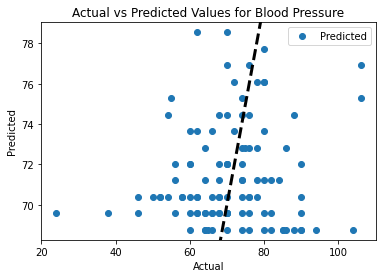

In [198]:
#Plotting actual vs predicted values for blood pressure
df.plot(x='Actual', y='Predicted', style='o')
plt.title('Actual vs Predicted Values for Blood Pressure')
plt.xlabel('Actual')
plt.ylabel('Predicted')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
plt.show()

In [199]:
#As we can see above, though we can detect some vague trend along the 45 degree line where all actual values = predicted values, there is still quite a lot of variation
#Our model therefore does not seem to do a great job at predicting blood pressure based on pregnancies

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 9.767731791663653
Mean Squared Error: 168.89519296963817
Root Mean Squared Error: 12.995968335204505


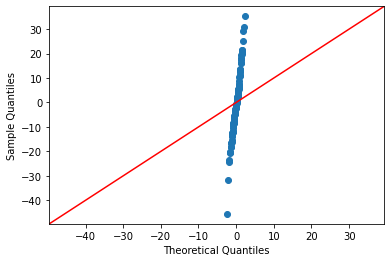

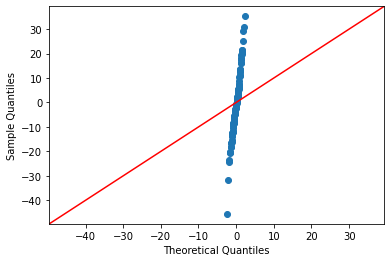

In [200]:
#Our root mean squared error shows us that the standard deviation of our residuals is about 13mm Hg
#Or in simpler terms, the difference between predicted and observed blood pressures is typically 13mm Hg

#QQ plot for residuals
residuals = y_test-y_pred
sm.qqplot(residuals, line ='45')


In [98]:
#As shown above, the residuals in our model do not follow a normal distribution, and are far more spread out 
#This may indicate the model is a poor fit for estimating blood pressure


In [209]:
#Multiple linear regression with BMI as dependent variable
X = diabetes[['Pregnancies']]
y = diabetes['BMI']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(f'intercept: {regressor.intercept_}')
print(f'regression coefficient: {regressor.coef_}')
print(f'r_sqr value: {regressor.score(X_train, y_train)}')

intercept: 32.891408018534236
regression coefficient: [0.01495831]
r_sqr value: 5.306301269869529e-05


In [210]:
#As seen above, via linear regression we expect BMI to be 32 when someone has had no pregnancies
#With every pregnancy, BMI is expected to increase by 0.015
#An r square value of 5.31e-05 indicates that pregnancies do not significantly explain variances in BMI

#Calculating predicted values below
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual  Predicted
580    42.1  32.891408
421    26.0  32.921325
692    39.1  32.921325
120    53.2  32.891408
550    27.4  32.906366
..      ...        ...
493    28.9  32.951241
19     34.6  32.906366
662    37.6  33.011075
237    44.1  32.891408
288    20.8  32.951241

[107 rows x 2 columns]

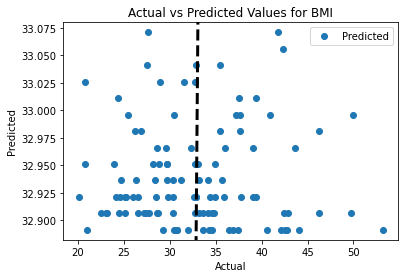

In [212]:
#Plotting actual vs predicted values for BMI
df.plot(x='Actual', y='Predicted', style='o')
plt.title('Actual vs Predicted Values for BMI')
plt.xlabel('Actual')
plt.ylabel('Predicted')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
plt.show()

In [213]:
#As we can see above, our model does not do a good job at predicting BMI based on pregnancies

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.414916383866474
Mean Squared Error: 46.234643055494814
Root Mean Squared Error: 6.799606095612805


Text(0.5, 1.0, 'QQ plot for BMI residuals')

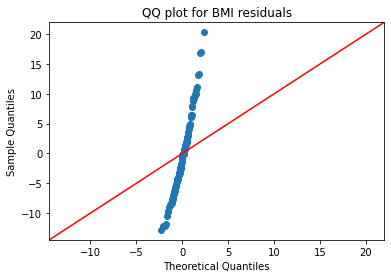

In [215]:
#Our root mean squared error shows us that the standard deviation of our residuals is about 6.8
#Or in simpler terms, the difference between predicted and observed BMIs is 'typically' 6.8

#QQ plot for residuals
residuals = y_test-y_pred
sm.qqplot(residuals, line ='45')
plt.title('QQ plot for BMI residuals')


In [205]:
#As we can see above our residuals for BMI are also not normally distributed and are more spread out 

In [216]:
#Multiple linear regression with Insulin as dependent variable
X = diabetes[['Pregnancies']]
y = diabetes['Insulin']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(f'intercept: {regressor.intercept_}')
print(f'regression coefficient: {regressor.coef_}')
print(f'r_sqr value: {regressor.score(X_train, y_train)}')

intercept: 121.23166472127902
regression coefficient: [-1.23632972]
r_sqr value: 0.0010738841878700223


In [217]:
#As seen above, via linear regression we expect insulin to be 121mu U/ml when someone has had no pregnancies
#With every pregnancy, insulin is expected to decrease by 1.24mu U/ml
#An r square value of 0.001 indicates that pregnancies do not significantly explain variances in insulin levels

#Calculating predicted values below
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual   Predicted
580       0  121.231665
421      76  118.759005
692      95  118.759005
120     100  121.231665
550       0  119.995335
..      ...         ...
493     122  116.286346
19       96  119.995335
662     231  111.341027
237       0  121.231665
288      49  116.286346

[107 rows x 2 columns]

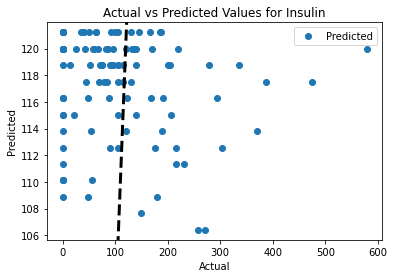

In [218]:
#Plotting actual vs predicted values for insulin
df.plot(x='Actual', y='Predicted', style='o')
plt.title('Actual vs Predicted Values for Insulin')
plt.xlabel('Actual')
plt.ylabel('Predicted')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
plt.show()

In [219]:
#As we can see above, our model does not do a good job at predicting insulin based on pregnancies

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 81.2365461604332
Mean Squared Error: 11512.381702691764
Root Mean Squared Error: 107.29576740343379


Text(0.5, 1.0, 'QQ plot for insulin residuals')

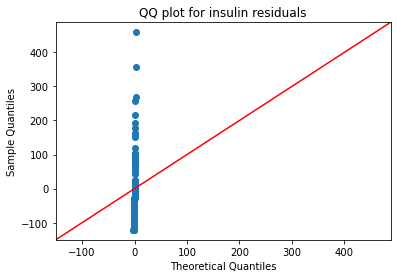

In [221]:
#Our root mean squared error shows us that the standard deviation of our residuals is about 107
#Or in simpler terms, the difference between predicted and observed insulin levels is 'typically' 107mu U/ml

#QQ plot for residuals
residuals = y_test-y_pred
sm.qqplot(residuals, line ='45')
plt.title('QQ plot for insulin residuals')


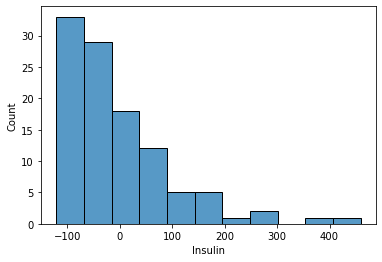

In [110]:
#As we can see below, residuals are right-skewed and not normally distributed
sns.histplot(residuals)

In [111]:
#Extra explanations: so our ANOVAs tell us that there are some statistically significant differences in means of different pregnancy groups, but 
#a large part of the deviation is explained by the drop in blood pressure and BMI for the first few pregnancies 
#linear regression models show that changes in blood pressure, BMIs and insulin levels cannot be explained by 
#an increase in the number of pregnancies, given their low r square values and inability to predict bp/BMI/insulin levels
#Therefore, these results cannot corroborate previous findings of pregnancies potentially causing higher BMI or lower insulin which may 
#contribute to gestational diabetes

# Linear Regression: Extras

In [223]:
#Multiple linear regression with pregnancies, BMI and skin thickness as independent variables
X = diabetes[['Pregnancies','BMI','Age']]
y = diabetes['BloodPressure']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [224]:
print(f'intercept: {regressor.intercept_}')

intercept: 45.23549883621186


In [225]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Pregnancies     0.039764
BMI             0.434622
Age             0.375500

In [181]:
#so for every increase by one unit of BMI, age and with every pregnancy respectively, blood pressure increases by 0.43, 0.38 and 0.04mm Hg

print(f'r_sqr value: {regressor.score(X_train, y_train)}')

r_sqr value: 0.19178819217975607


In [226]:
#An r square value of 0.19 indicates that our chosen variables do not explain any significant differences in blood pressure, though they do explain more than pregnancies would alone

#making predictions
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual  Predicted
580      90  71.418575
421      68  64.500696
692      70  70.945239
120      76  77.744876
550      70  65.069403
..      ...        ...
493      70  74.852637
19       70  72.329183
662     106  78.041899
237      90  73.038819
288      56  64.197694

[107 rows x 2 columns]

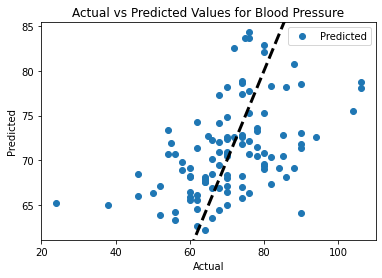

In [228]:
df.plot(x='Actual', y='Predicted', style='o')
plt.title('Actual vs Predicted Values for Blood Pressure')
plt.xlabel('Actual')
plt.ylabel('Predicted')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
plt.show()

In [190]:
#The black dotted line represents the 45 degree line where predicted values = actual values
#As we can see above, our model does a slightly better job at predicting blood pressure based on our chosen explanatory variables

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.721693390037585
Mean Squared Error: 132.69781682717505
Root Mean Squared Error: 11.519453842399606


In [191]:
#Our root mean squared error shows us that that the difference between predicted and observed blood pressures is typically 11.5mm Hg

Text(0, 0.5, 'Residuals')

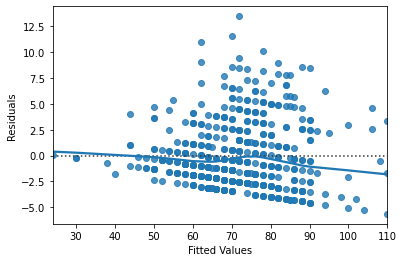

In [192]:
sns.residplot(x="BloodPressure", y="Pregnancies", data=diabetes, lowess = True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

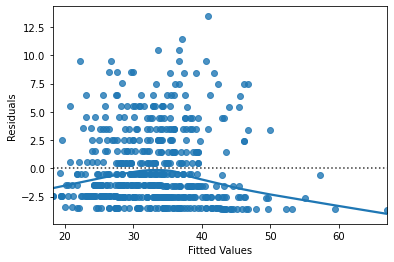

In [193]:
#The residual plot above show that the residuals are not normally distributed with mean zero when plotting blood pressure against pregnancies

sns.residplot(x="BMI", y="Pregnancies", data=diabetes, lowess = True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

In [194]:
#The residual plot above show that the residuals are not normally distributed when plotting BMI against pregnancies

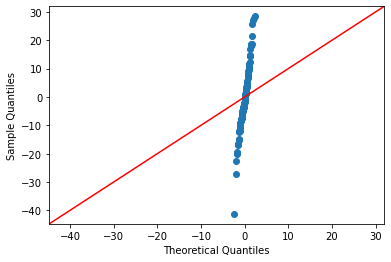

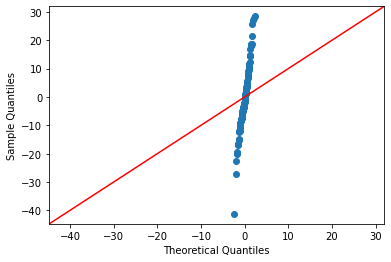

In [195]:
#QQ plot for MLS

residuals = y_test-y_pred
#qqplot(residuals, fit = True, line = '45' ) #I should not be using fit = True, right?
sm.qqplot(residuals, line ='45')

In [86]:
#As shown above, the residuals in our model do not follow a normal distribution, and the model is a particularly poor fit for estimating pregnancies